#**Heart Disease Prediction (ANN Model)**

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pydotplus 
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

##Loading Datasets

In [2]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


##Data Preprocessing

In [3]:
def encode(df,column,positive):
  df=df.copy()
  df[column]=df[column].apply(lambda x:1 if x==positive else 0)
  return df

In [4]:
df=encode(df,'Heart Disease','Presence')
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


##EDD (Extended Data Dictionary)

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [6]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [7]:
x=df.iloc[:,:13].values
y=df.iloc[:,13].values
x,y

(array([[70.,  1.,  4., ...,  2.,  3.,  3.],
        [67.,  0.,  3., ...,  2.,  0.,  7.],
        [57.,  1.,  2., ...,  1.,  0.,  7.],
        ...,
        [56.,  0.,  2., ...,  2.,  0.,  3.],
        [57.,  1.,  4., ...,  2.,  0.,  6.],
        [67.,  1.,  4., ...,  2.,  3.,  3.]]),
 array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [10]:
x_train.shape

(216, 13)

In [11]:
y_train.shape

(216,)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
cls=Sequential()

In [32]:
cls.add(Dense(units=120,kernel_initializer='uniform',activation='relu',input_dim=13))
cls.add(Dense(units=60,kernel_initializer='uniform',activation='relu'))
cls.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [33]:
cls.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1680      
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
 dense_3 (Dense)             (None, 120)               240       
                                                                 
 dense_4 (Dense)             (None, 20)                2420      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
 dense_6 (Dense)             (None, 120)               2

In [34]:
cls.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
cls.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.9491
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.9954
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5777 - accuracy: 0.9954
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.9954
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.9954
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9954
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9954
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9954
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9954
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9954
Epoch 11/

In [36]:
y_pred=cls.predict(x_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False]])

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[23,  7],
       [ 7, 17]])

In [38]:
accuracy_score(y_test,y_pred)

0.7407407407407407

In [39]:
from tensorflow.keras.utils import plot_model

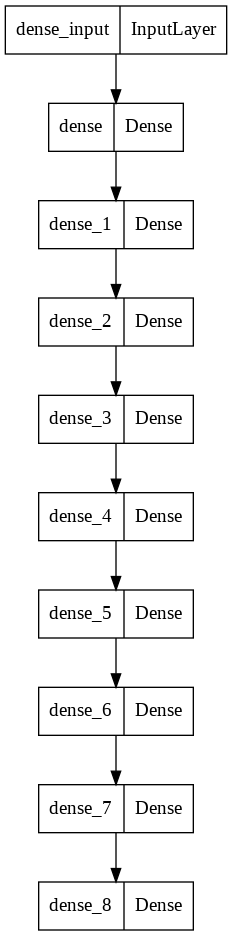

In [40]:
plot_model(cls)